# Accuracy Metric Uncertainty

This notebook provides an example how Probatus can be used to estimate the uncertainty around the accuracy metric of a given model.

In [1]:
import numpy as np
from probatus.metric_uncertainty import VolatilityEstimation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from probatus.models import lending_club_model
from probatus.datasets import lending_club

### Loading Data

For the example we use the lending club data and model that are already provided in Probatus and we will investigate the uncertainty around the AUC.

In [2]:
# loading a the 'lending club' model
model = lending_club_model()

# and the associated original data
data = lending_club(modelling_mode = False)[0]
y = data[['default']]
X = data.drop(['id', 'loan_issue_date','default'], axis = 1)

# defining the metrics we are interested in
evaluators =  {'AUC' : [roc_auc_score,'proba']}

/Users/fb24xi/miniconda3/envs/probapy/lib/python3.6/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.2 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/fb24xi/miniconda3/envs/probapy/lib/python3.6/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.20.2 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


### Running Uncertainty Evaluation

#### Bootstrap replicates

First fitting the localised bootstrap replicates with overlap

In [3]:
# declaring the evaluation class
checker = VolatilityEstimation(model, X, y, evaluators, 'boot_seed')

# running 1000 random samples with 40% of data assigned to test partition
checker.estimate(0.4,1000)

The uncertainty is provided in term of the standard deviation.

In [4]:
checker.reporting('AUC')

Mean of metric on train is 0.92
Mean of metric on test is 0.71
Mean of delta is 0.21
Standard Deviation of metric on train is 0.0093
Standard Deviation of metric on test is 0.02
Standard Deviation of delta is 0.02318


and histograms allow to see the differences between the train and the test sets.

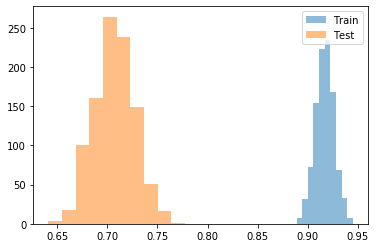

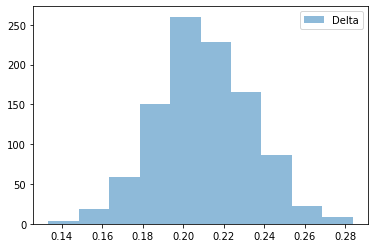

In [5]:
checker.plot('AUC')

#### Global bootrap non overlapping k folds

The number of max folds is determined by the nature of the data: what is the maximum number of folds to ensure there is balanced number of classed in each fold.

In [6]:
# declaring the evaluation class
checker = VolatilityEstimation(model, X, y, evaluators, 'boot_global')

# running 1000 random samples with 40% of data assigned to test partition
checker.estimate(0.1)

In [7]:
checker.reporting('AUC')

Mean of metric on train is 0.97
Mean of metric on test is 0.65
Mean of delta is 0.32
Standard Deviation of metric on train is 6e-05
Standard Deviation of metric on test is 0.00169
Standard Deviation of delta is 0.00173


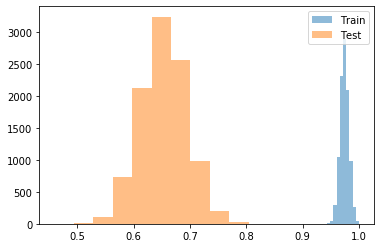

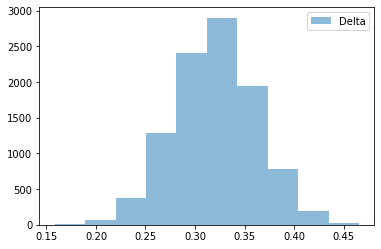

In [8]:
checker.plot('AUC')

#### DeLong approach (experimental)

In [9]:
# declaring the evaluation class
checker = VolatilityEstimation(model, X, y, evaluators, 'delong')

checker.estimate(0.4)

In [10]:
checker.reporting('AUC')

Mean of metric on train is 0.92
Mean of metric on test is 0.71
Mean of delta is 0.21
Standard Deviation of metric on train is 0.00011
Standard Deviation of metric on test is 0.00063
Standard Deviation of delta is 0.0


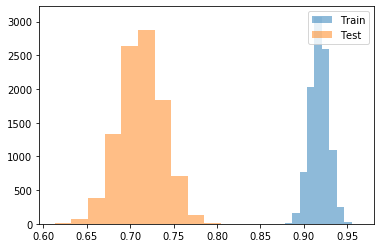

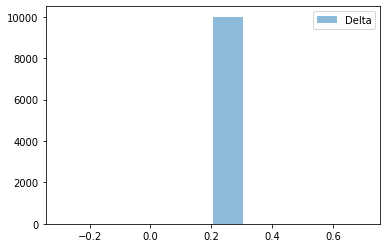

In [11]:
checker.plot('AUC')